In [1]:
require 'torch'
require 'nn'
require 'image'
utils = require 'utils'
require 'nngraph'
require 'ShaveImage'

In [2]:
local cmd = torch.CmdLine()

-- Model options
cmd:option('-model', 'checkpoint.t7')

-- Input / output options
cmd:option('-input_image', 'ei_capitan.jpeg')
cmd:option('-output_image', 'out.png')
cmd:option('-input_dir', '')
cmd:option('-output_dir', '')

-- GPU options
cmd:option('-gpu', -1)
cmd:option('-backend', 'cuda')
cmd:option('-use_cudnn', 1)
cmd:option('-cudnn_benchmark', 0)

opt = cmd:parse(arg or {})

In [3]:
dtype, use_cudnn = utils.setup_gpu(opt.gpu, opt.backend, opt.use_cudnn == 1)
ok, checkpoint = pcall(function() return torch.load(opt.model) end)
dtype = 'torch.FloatTensor'
if not ok then
    print('ERROR: Could not load model from ' .. opt.model)
end

In [4]:
model = checkpoint.model
model:evaluate()
model:type(dtype)

In [5]:
fname = 'mountain.jpg'
img = image.load(fname)
function random(lower, upper)
    local shrink = upper - lower
    return (torch.rand(1) * shrink + lower)[1]
end 

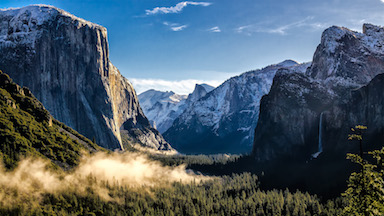

In [6]:
itorch.image(img)

In [7]:
img:type('torch.FloatTensor'):size()

   3
 216
 384
[torch.LongStorage of size 3]



In [8]:
img = image.load(fname):type('torch.FloatTensor')
img_pro = torch.Tensor(img:size())

img_pro[1] = img[1] * random(0.6, 1.4)
img_pro[2] = img[2]
img_pro[3] = img[3] * random(0.6, 1.4)

for ind = 1, 3 do  
    img_pro[ind][torch.lt(img_pro[ind], 0)] = 0
    img_pro[ind][torch.gt(img_pro[ind], 1)] = 1
end

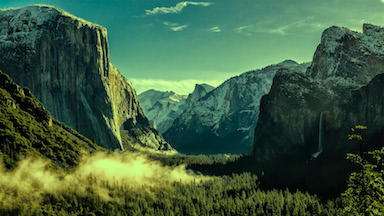

   3
 216
 384
[torch.LongStorage of size 3]



In [9]:
itorch.image(img_pro)
print(img_pro:size())

In [10]:
print(img_pro:size())
res = model:forward(img_pro:type(dtype))
print(res:size())

   3
 216
 384
[torch.LongStorage of size 3]



   1
   3
 216
 384
[torch.LongStorage of size 4]



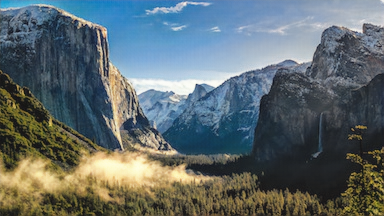

In [11]:
itorch.image(res[1])

In [13]:
temp = torch.eye(384)
for ind =1, temp:size()[1] do
    temp[ind][ind] = 0.7 + (ind - 1) * 0.6 / (temp:size()[1] - 1)
end
temp = temp:type('torch.FloatTensor')
print(temp:size())

 384
 384
[torch.LongStorage of size 2]



   3
 216
 384
[torch.LongStorage of size 3]



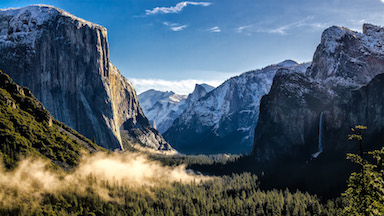

In [15]:
img = image.load(fname):type('torch.FloatTensor')
temp_img = img:clone()
itorch.image(temp_img)
print(temp_img:size())

In [16]:
temp_img[1] = temp_img[1] * temp
temp_img[3] = temp_img[3] * temp

   3
 216
 384
[torch.LongStorage of size 3]



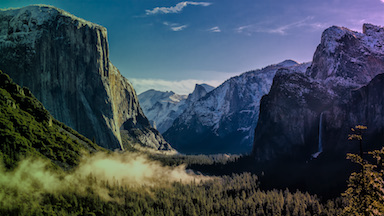

In [17]:
itorch.image(temp_img)
print(temp_img:size())
img_pro = temp_img